In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family 

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [7]:
all_features = list(df.columns)
all_features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'country',
 'salary']

In [9]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [11]:
numerical_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [12]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [13]:
df_train.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt      education  education-num  \
5514    33          Local-gov  198183      Bachelors             13   
19777   36            Private   86459      Assoc-voc             11   
10781   58   Self-emp-not-inc  203039            9th              5   
32240   21            Private  180190      Assoc-voc             11   
9876    27            Private  279872   Some-college             10   
...    ...                ...     ...            ...            ...   
29802   47            Private  359461      Bachelors             13   
5390    31            Private  147215           12th              8   
860     18            Private  216284           11th              7   
15795   50   Self-emp-not-inc   54261        HS-grad              9   
23654   34       Self-emp-inc  127651      Bachelors             13   

            marital-status        occupation    relationship    race      sex  \
5514         Never-married    Pr

In [15]:
df_train = df_train.replace(to_replace = '%?%', value = np.nan)
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [16]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [14]:
df_test.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt      education  education-num  \
14160   27            Private  160178   Some-college             10   
27048   45          State-gov   50567        HS-grad              9   
28868   29            Private  185908      Bachelors             13   
5667    30            Private  190040      Bachelors             13   
7827    29   Self-emp-not-inc  189346   Some-college             10   
...    ...                ...     ...            ...            ...   
1338    71            Private  269708      Bachelors             13   
24534   55          Local-gov  253062   Some-college             10   
18080   47            Private  354148    Prof-school             15   
10354   27            Private   43652      Bachelors             13   
24639   18            Private   25837        HS-grad              9   

            marital-status          occupation    relationship    race  \
14160             Divorced        Adm-c

In [17]:
nan_values = df_train.columns[df_train.isnull().any()]
df_train[nan_values].isnull().sum()

Series([], dtype: float64)

In [18]:
for i in list(nan_values):
    df_train[i].fillna(df_train[i].mode().values[0],inplace=True)

In [19]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [20]:
df_train.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt      education  education-num  \
5514    33          Local-gov  198183      Bachelors             13   
19777   36            Private   86459      Assoc-voc             11   
10781   58   Self-emp-not-inc  203039            9th              5   
32240   21            Private  180190      Assoc-voc             11   
9876    27            Private  279872   Some-college             10   
...    ...                ...     ...            ...            ...   
29802   47            Private  359461      Bachelors             13   
5390    31            Private  147215           12th              8   
860     18            Private  216284           11th              7   
15795   50   Self-emp-not-inc   54261        HS-grad              9   
23654   34       Self-emp-inc  127651      Bachelors             13   

            marital-status        occupation    relationship    race      sex  \
5514         Never-married    Pr

In [21]:
df_test = df_test.replace(to_replace = '%?%', value = np.nan)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


In [23]:
nan_values2 = df_test.columns[df_test.isnull().any()]
df_test[nan_values].isnull().sum()

Series([], dtype: float64)

In [24]:
for i in list(nan_values2):
    df_test[i].fillna(df_test[i].mode().values[0],inplace=True)

In [25]:
df_test.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,71,Private,269708,Bachelors,13,Divorced,Tech-support,Own-child,White,Female,2329,0,16,United-States,<=50K
24534,55,Local-gov,253062,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
18080,47,Private,354148,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,48,United-States,>50K
10354,27,Private,43652,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [26]:
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [27]:
le = preprocessing.LabelEncoder()

In [28]:
for i in categorical_features:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

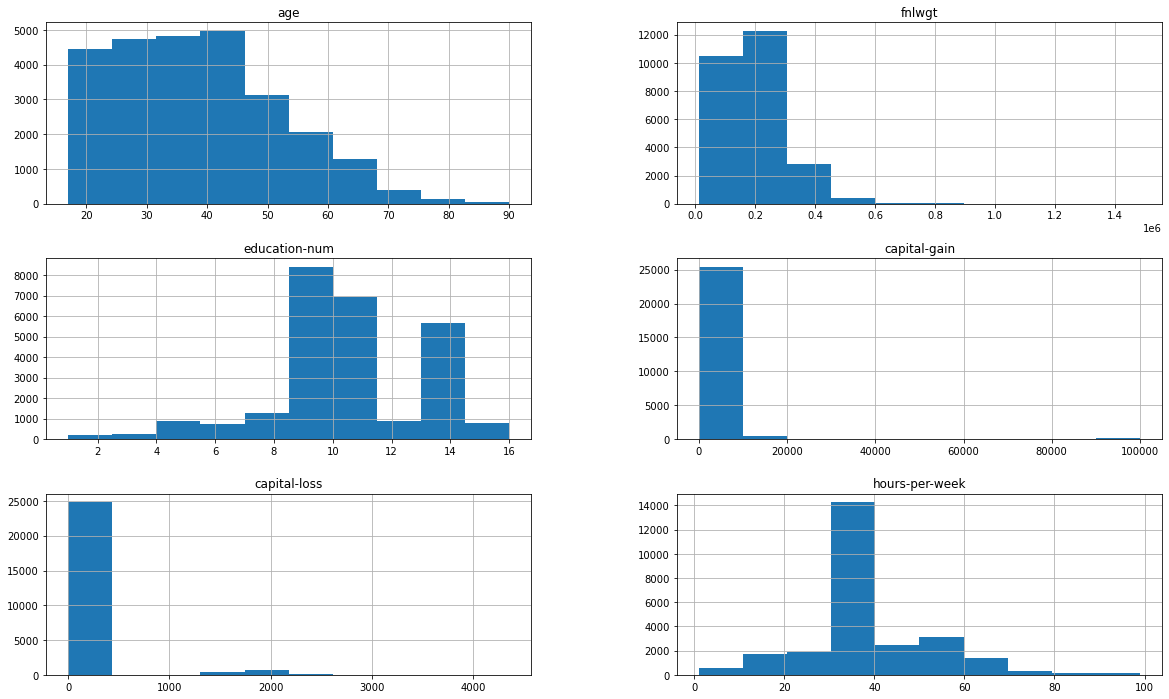

In [29]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 12
df_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

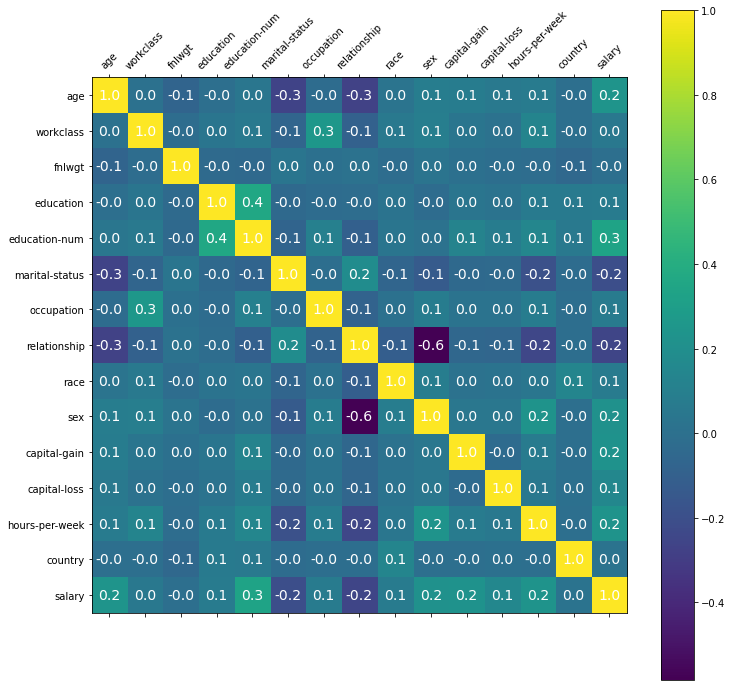

In [30]:
plt.matshow(df_train.corr())
plt.colorbar()
plt.xticks(np.arange(len(df_train.corr().columns)), df_train.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df_train.corr().columns)), df_train.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df_train.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

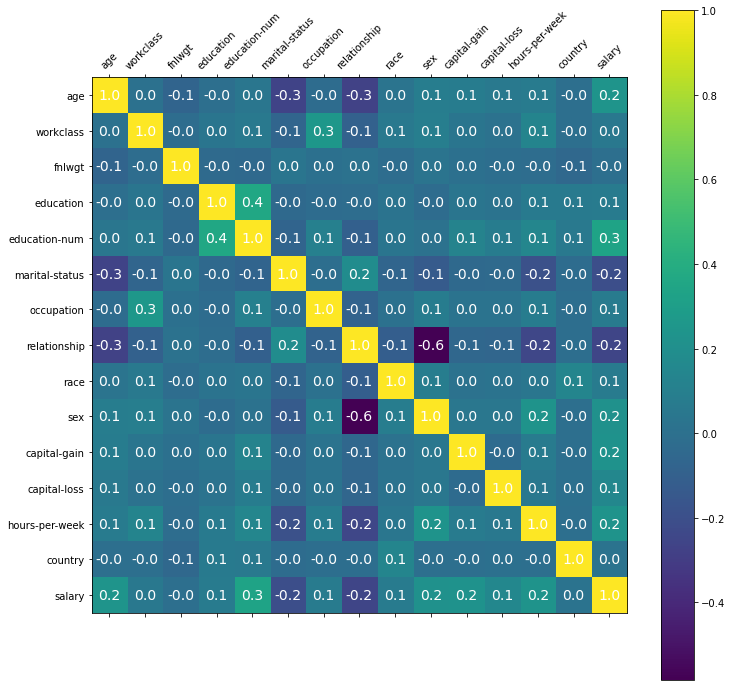

In [31]:
plt.matshow(df_train.corr())
plt.colorbar()
plt.xticks(np.arange(len(df_train.corr().columns)), df_train.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df_train.corr().columns)), df_train.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df_train.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [32]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
5514,33,2,198183,9,13,4,10,1,4,0,0,0,50,39,1
19777,36,4,86459,8,11,2,4,0,4,1,0,1887,50,39,1
10781,58,6,203039,6,5,5,3,1,4,1,0,0,40,39,0
32240,21,4,180190,8,11,2,5,0,4,1,0,0,46,39,0
9876,27,4,279872,15,10,0,8,1,4,1,0,0,40,39,0


In [33]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
14160,27,3,160178,15,10,0,1,1,4,0,0,0,38,37,0
27048,45,6,50567,11,9,2,4,5,4,0,0,0,40,37,0
28868,29,3,185908,9,13,2,4,0,2,1,0,0,55,37,1
5667,30,3,190040,9,13,4,7,1,4,0,0,0,40,37,0
7827,29,5,189346,15,10,0,3,1,4,1,2202,0,50,37,0


In [34]:
df_test.replace(to_replace="|1x3 Cross validator",value="")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
14160,27,3,160178,15,10,0,1,1,4,0,0,0,38,37,0
27048,45,6,50567,11,9,2,4,5,4,0,0,0,40,37,0
28868,29,3,185908,9,13,2,4,0,2,1,0,0,55,37,1
5667,30,3,190040,9,13,4,7,1,4,0,0,0,40,37,0
7827,29,5,189346,15,10,0,3,1,4,1,2202,0,50,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,71,3,269708,9,13,0,13,3,4,0,2329,0,16,37,0
24534,55,2,253062,15,10,2,10,0,4,1,0,0,40,37,1
18080,47,3,354148,14,15,2,10,0,4,1,99999,0,48,37,1
10354,27,3,43652,9,13,4,1,1,4,0,0,0,40,37,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

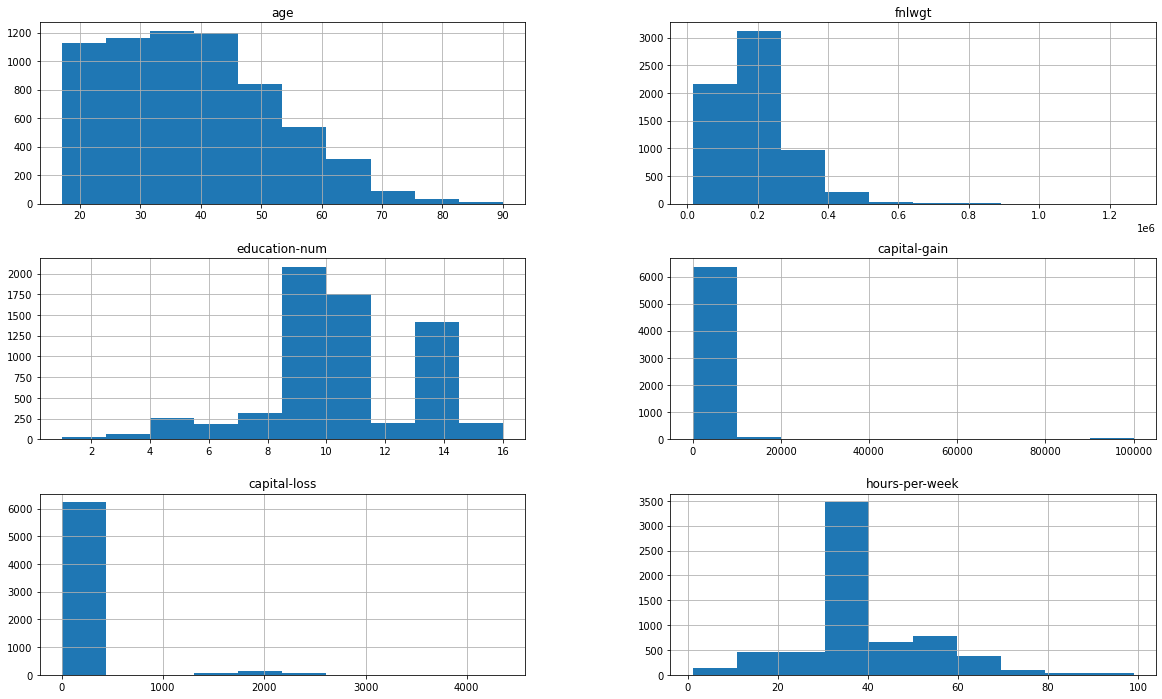

In [35]:
rcParams['figure.figsize'] = 20, 12
df_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

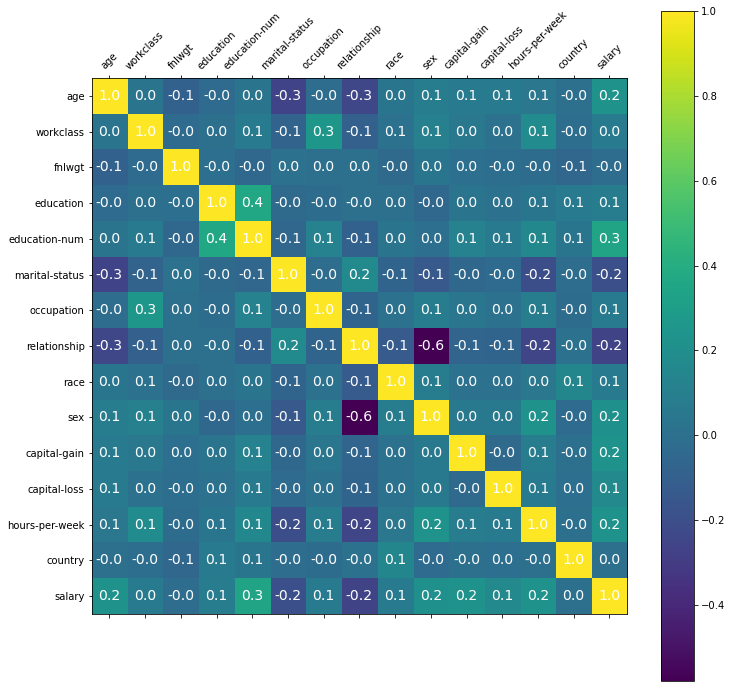

In [36]:
plt.matshow(df_test.corr())
plt.colorbar()
plt.xticks(np.arange(len(df_test.corr().columns)), df_test.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df_test.corr().columns)), df_test.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df_train.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [37]:
x_train = df_train.iloc[:,0:14]
y_train = df_train.iloc[:,-1]
x_test = df_test.iloc[:,0:14]
y_test = df_test.iloc[:,-1]

In [38]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
5514,33,2,198183,9,13,4,10,1,4,0,0,0,50,39
19777,36,4,86459,8,11,2,4,0,4,1,0,1887,50,39
10781,58,6,203039,6,5,5,3,1,4,1,0,0,40,39
32240,21,4,180190,8,11,2,5,0,4,1,0,0,46,39
9876,27,4,279872,15,10,0,8,1,4,1,0,0,40,39


In [39]:
y_train.head()

5514     1
19777    1
10781    0
32240    0
9876     0
Name: salary, dtype: int32

In [40]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
14160,27,3,160178,15,10,0,1,1,4,0,0,0,38,37
27048,45,6,50567,11,9,2,4,5,4,0,0,0,40,37
28868,29,3,185908,9,13,2,4,0,2,1,0,0,55,37
5667,30,3,190040,9,13,4,7,1,4,0,0,0,40,37
7827,29,5,189346,15,10,0,3,1,4,1,2202,0,50,37


In [41]:
y_test.head()

14160    0
27048    0
28868    1
5667     0
7827     0
Name: salary, dtype: int32

In [42]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(26048, 14) (26048,) (6513, 14) (6513,)


In [43]:
#logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
logistic_pre = logistic_reg.predict(x_test)

In [44]:
logistic_pre

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
losgisticreg_trainscore = logistic_reg.score(x_train, y_train)
losgisticreg_testscore = logistic_reg.score(x_test, y_test)
losgisticreg_pred = logistic_reg.predict(x_test)
print("Logistic Regression Accuracy: ")
print("LR Train Accuracy: ",losgisticreg_trainscore*100)
print("LR Test Accuracy: ",losgisticreg_testscore*100)

Logistic Regression Accuracy: 
LR Train Accuracy:  78.72773341523342
LR Test Accuracy:  78.88837709196991


In [46]:
#KNN
KNN = KNeighborsClassifier(n_neighbors=25)
KNN.fit(x_train, y_train)
knn_pre = KNN.predict(x_test)

In [47]:
knn_pre

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
knn_trainscore = KNN.score(x_train, y_train)
knn_testscore = KNN.score(x_test, y_test)
print("KNN Accuracy: ")
print("KNN Train Accuracy: ",knn_trainscore*100)
print("KNN Test Accuracy: ",knn_testscore*100)

KNN Accuracy: 
KNN Train Accuracy:  80.24032555282555
KNN Test Accuracy:  80.20881314294488


In [49]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
rd = RandomForestClassifier(n_estimators= 101, n_jobs=-1)
rd.fit(x_train,y_train)
rd_pred = rd.predict(x_test)

In [51]:
rd_pred

array([0, 0, 1, ..., 1, 0, 0])

In [52]:
rd_trainscore = rd.score(x_train, y_train)
rd_testscore = rd.score(x_test, y_test)
print("rd Accuracy: ")
print("rd Train Accuracy: ",rd_trainscore*100)
print("rd Test Accuracy: ",rd_testscore*100)

rd Accuracy: 
rd Train Accuracy:  99.99616093366093
rd Test Accuracy:  86.19683709504069


In [53]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [54]:
decision_tree = DecisionTreeClassifier(min_impurity_decrease = 0.05)
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_test)

In [55]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
dt_trainscore = decision_tree.score(x_train, y_train)
dt_testscore = decision_tree.score(x_test, y_test)
print("Decision Tree Accuracy: ")
print("DTree Train Accuracy: ",dt_trainscore*100)
print("DTree Test Accuracy: ",dt_testscore*100)

Decision Tree Accuracy: 
DTree Train Accuracy:  75.92905405405406
DTree Test Accuracy:  75.87901120835252


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
#Accuracy
accuracy_logistic = round(accuracy_score(y_test, logistic_pre)*100,2)
accuracy_knn = round(accuracy_score(y_test, knn_pre)*100,2)
accuracy_rd = round(accuracy_score(y_test, rd_pred)*100,2)
accuracy_dt = round(accuracy_score(y_test, dt_pred)*100,2)

In [59]:
#confusion matrix
confusion_lr = confusion_matrix(y_test, logistic_pre)
confusion_knn = confusion_matrix(y_test, knn_pre)
confusion_rd = confusion_matrix(y_test, rd_pred)
confusion_dt = confusion_matrix(y_test, dt_pred)

In [60]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_logistic,accuracy_knn,accuracy_rd, accuracy_dt],
    'Confusion_Matrix':[confusion_lr,confusion_knn,confusion_rd,confusion_dt]})                
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(5)

,Accuracy,Confusion_Matrix
Model,,
Random Forest,86.20,"[[4601, 341], [558, 1013]]"
KNN,80.21,"[[4896, 46], [1243, 328]]"
Logistic Regression,78.89,"[[4651, 291], [1084, 487]]"
Decision Tree,75.88,"[[4942, 0], [1571, 0]]"
